User segmentation

Segmentacja osobno dla osób, które dokonały zakupu (ordered=1), i dla tych, które nie dokonały zakupu (ordered=0), jest logiczna.
Dlaczego?
Obie grupy mogą mieć różne wzorce zachowań. Na przykład osoby, które dokonały zakupu, mogą być bardziej zaangażowane w określone działania na stronie (np. przeglądanie szczegółów produktu, wyszukiwanie, itp.).
Segmentowanie tych grup osobno pozwala na stworzenie dedykowanych strategii marketingowych:
Dla kupujących: podtrzymanie lojalności, cross-selling.
Dla niekupujących: optymalizacja konwersji poprzez lepsze zrozumienie ich barier zakupowych.

osobna segmentacja dla kupujących i niekupujących to dobra strategia. Pozwala ona:

Zrozumieć różnice w zachowaniach obu grup.
Tworzyć bardziej trafne rekomendacje:
Dla kupujących: co zrobić, aby kupowali więcej.
Dla niekupujących: jakie działania mogą zwiększyć konwersję.

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import prince
from IPython.display import display

In [2]:
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('Data/training_sample.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [5]:
# Spliting data into two categories
buyers = df_train[df_train['ordered'] == 1].drop(columns=['ordered', 'UserID'])
non_buyers = df_train[df_train['ordered'] == 0].drop(columns=['ordered', 'UserID'])

**1. Buyers segmentation**

Multiple Correspondence Analysis (MCA)

I choose  components because MCA with 8 dimensions explain more then 50 % of variance

In [6]:
# Creating model
mca = prince.MCA(
    n_components=8,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Model fitting and data transformation
mca_results_buyers = mca.fit_transform(buyers)

# Adding MCA results to original dataset
buyers_with_mca = buyers.copy()

# Loop for adding all compoments to DataFrame
for i in range(mca.n_components):
    buyers_with_mca[f'MCA{i}'] = mca_results_buyers.iloc[:, i- 1]

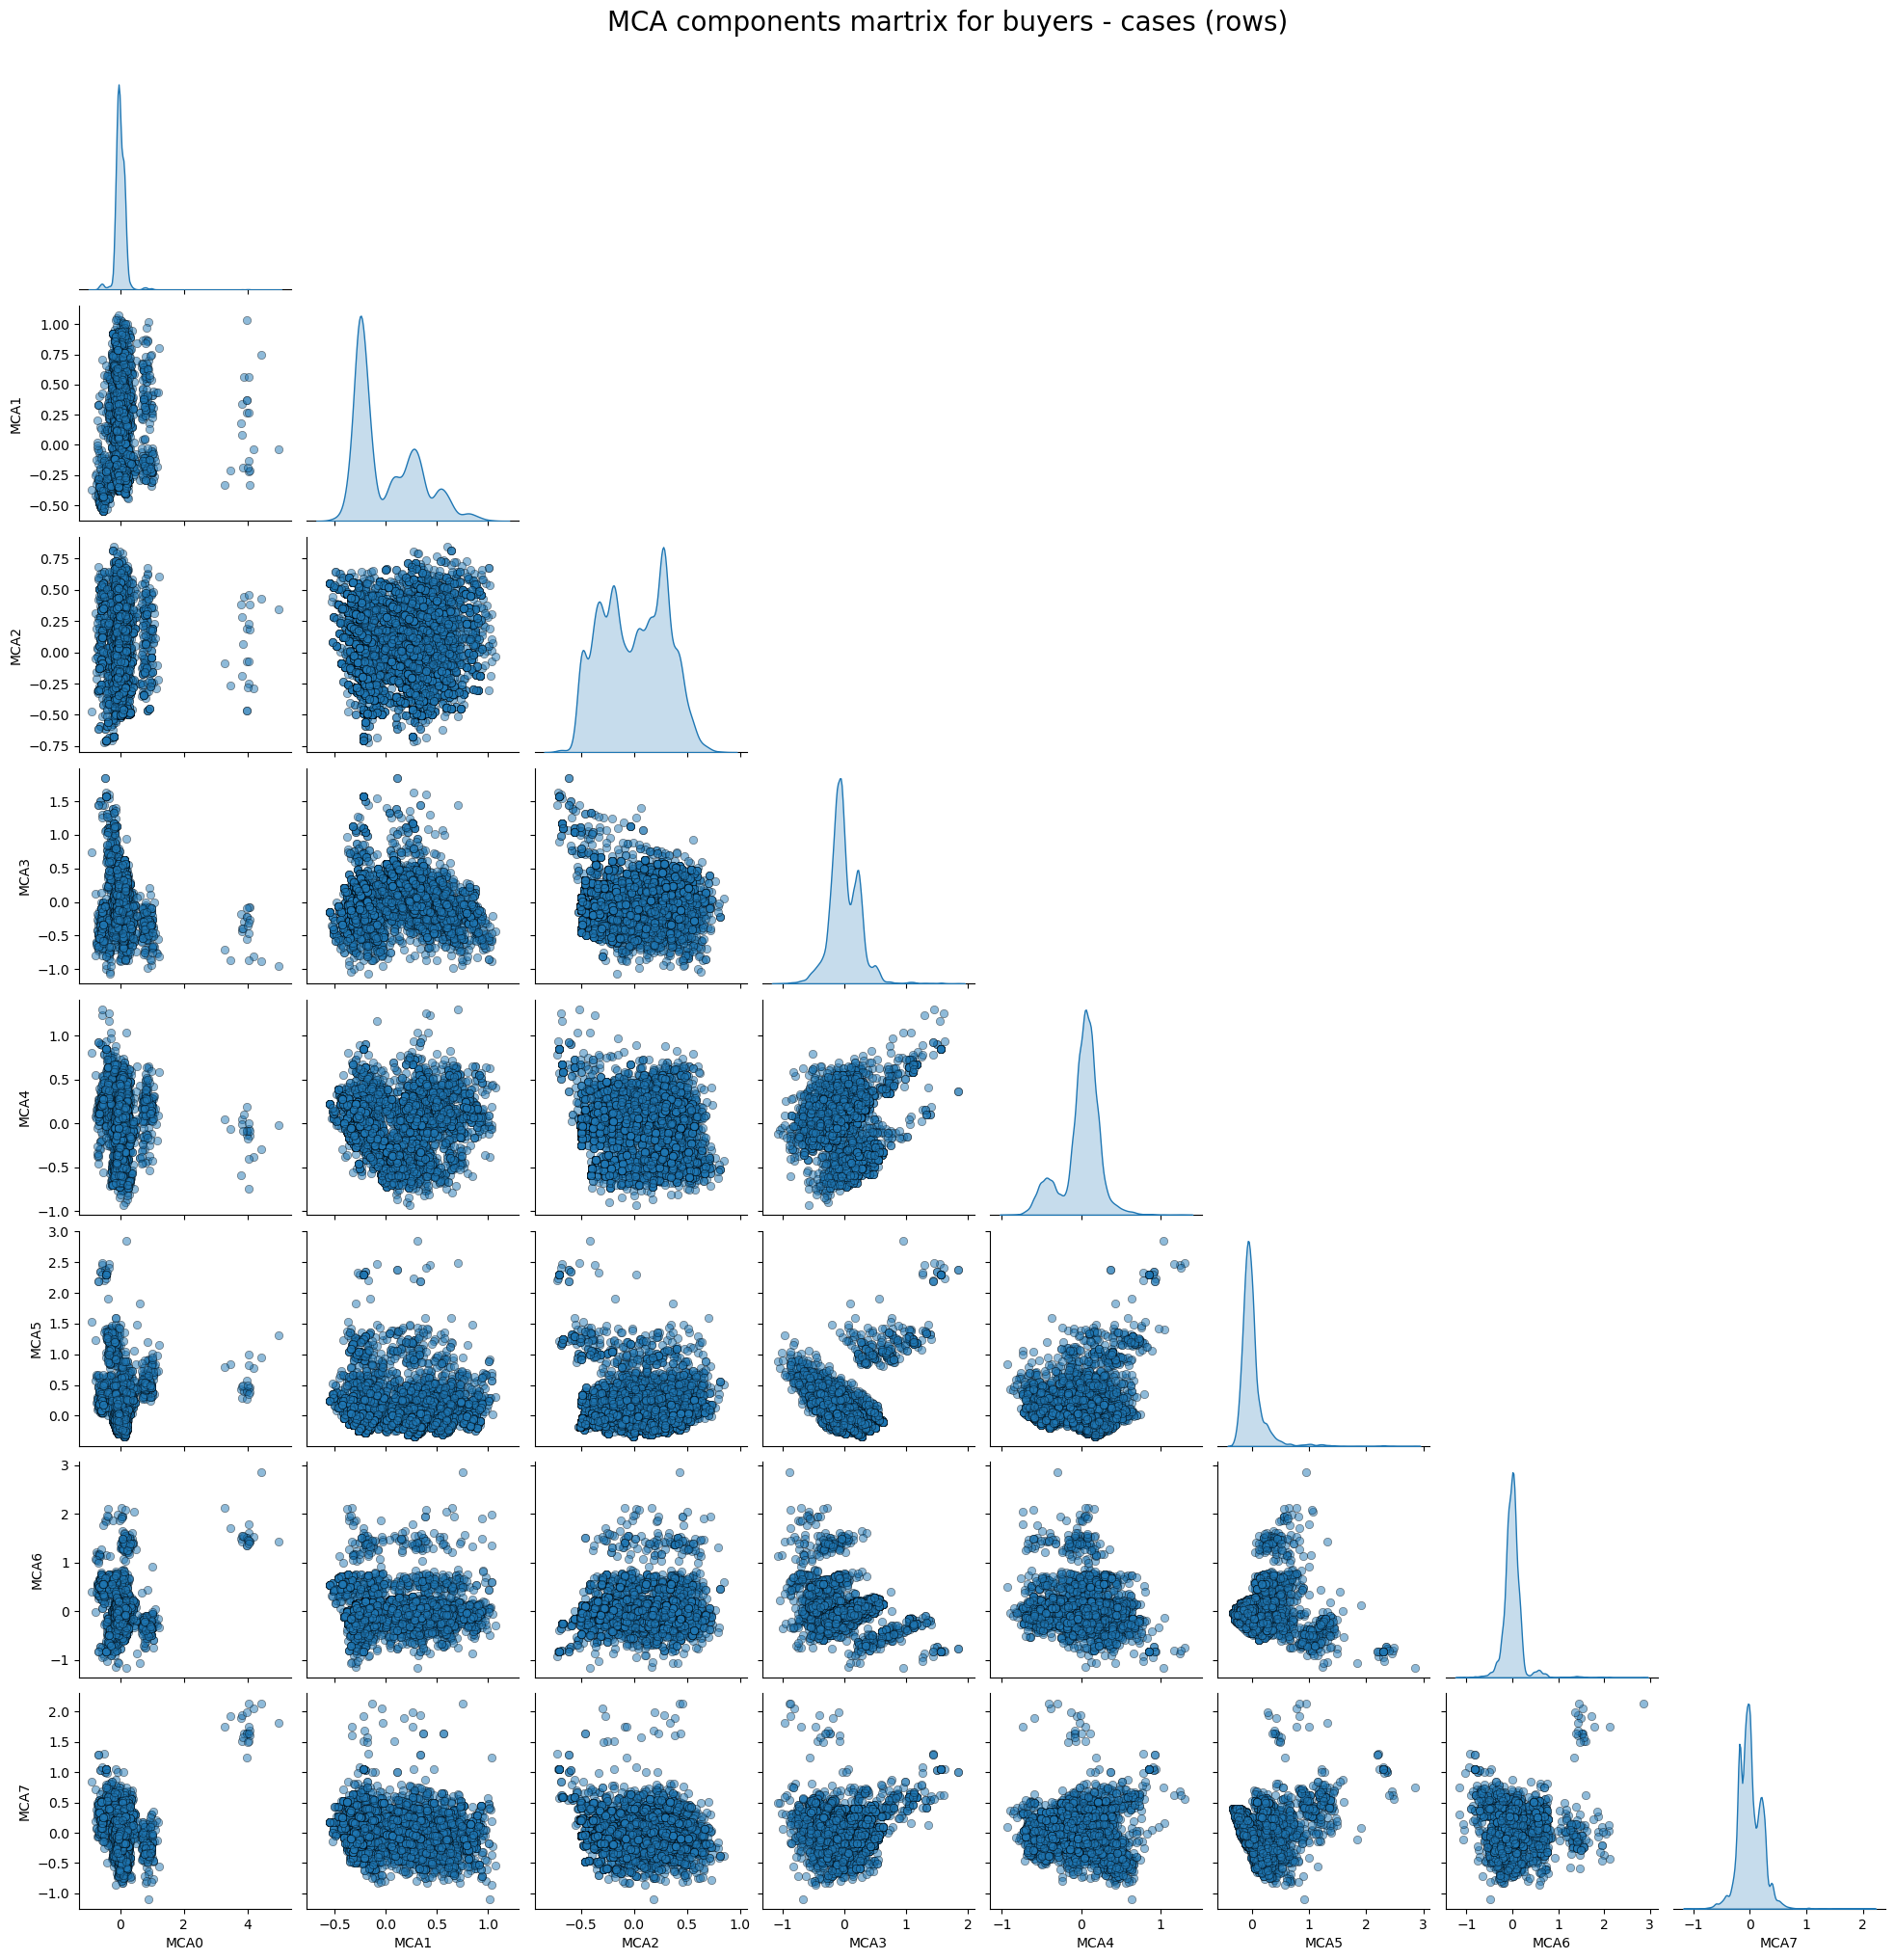

In [7]:

buyers_mca_only = buyers_with_mca[['MCA0', 'MCA1', 'MCA2', 'MCA3', 'MCA4', 'MCA5', 'MCA6', 'MCA7']]

# Creating pairplot matrix 
pairplot = sns.pairplot(
    buyers_mca_only,
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 'edgecolor': 'k'},
    corner=True
)
pairplot.fig.suptitle('MCA components martrix for buyers - cases (rows)', fontsize=20, y=1.02)
plt.show()

In [8]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.099        10.31%                     10.31%
1              0.090         9.43%                     19.73%
2              0.058         6.09%                     25.83%
3              0.054         5.66%                     31.49%
4              0.050         5.20%                     36.68%
5              0.047         4.88%                     41.57%
6              0.045         4.71%                     46.28%
7              0.044         4.60%                     50.88%

In [9]:
mca.row_coordinates(buyers).head()

0         1         2         3         4         5         6  \
4   0.414229  0.357280  0.408941 -0.300678 -0.123697  0.142242  0.298421   
47  0.541981  0.400095 -0.132301  0.169098 -0.194959 -0.100425  0.203913   
56  0.117936  0.120673  0.052515 -0.507634 -0.010816 -0.015903  0.104279   
62  0.190745  0.297507  0.286415  0.305401 -0.171291  0.129342  0.006734   
66 -0.139051 -0.499225 -0.125859 -0.109327 -0.125289 -0.121110  0.206433   

           7  
4  -0.111232  
47 -0.086510  
56 -0.149576  
62  0.035546  
66  0.003597

In [10]:
mca.column_coordinates(buyers).head(50)

0             1             2  \
basket_icon_click__0        3.493167e-01 -8.580768e-01  2.221850e-01   
basket_icon_click__1       -1.419188e-01  3.486154e-01 -9.026827e-02   
basket_add_list__0          1.698615e-02 -7.003482e-01 -1.464727e-01   
basket_add_list__1         -2.200358e-02  9.072196e-01  1.897384e-01   
basket_add_detail__0       -1.906001e-01  1.628424e-01  1.092087e+00   
basket_add_detail__1        6.700078e-02 -5.724323e-02 -3.838965e-01   
sort_by__0                 -1.673892e-01 -8.717269e-02  1.253126e-02   
sort_by__1                  1.777810e+00  9.258451e-01 -1.330922e-01   
image_picker__0            -1.700410e-01 -2.949004e-02  4.355623e-02   
image_picker__1             1.907114e+00  3.307489e-01 -4.885098e-01   
account_page_click__0       2.388798e-02 -1.097240e-02  3.258166e-02   
account_page_click__1      -1.176357e+00  5.403331e-01 -1.604475e+00   
promo_banner_click__0      -7.821454e-03 -4.332517e-02  4.531712e-02   
promo_banner_click__1       1.475740e-01  8.174527e-01 -8.550364e-01   
detail_wishlist_add__0     -4.212849e-03 -2.620797e-03  1.671314e-02   
detail_wishlist_add__1      4.104053e-01  2.553116e-01 -1.628153e+00   
list_size_dropdown__0       8.885642e-02 -8.795655e-01 -5.726210e-02   
list_size_dropdown__1      -7.506007e-02  7.429992e-01  4.837126e-02   
closed_minibasket_click__0  6.497709e-02 -1.210303e-01  4.585354e-02   
closed_minibasket_click__1 -5.568814e-01  1.037282e+00 -3.929844e-01   
checked_delivery_detail__0  3.107617e-02 -2.486091e-01  2.550170e+00   
checked_delivery_detail__1 -3.239842e-04  2.591871e-03 -2.658676e-02   
checked_returns_detail__0  -2.646496e-02 -1.046987e-03  6.702708e-02   
checked_returns_detail__1   7.026771e-01  2.779879e-02 -1.779651e+00   
sign_in__0                 -2.019161e-02 -1.480667e+00  4.624853e+00   
sign_in__1                  1.244951e-04  9.129322e-03 -2.851538e-02   
saw_checkout__1             1.820375e-16  1.674957e-16 -1.793270e-16   
saw_sizecharts__0          -5.458317e-04 -2.158716e-04  1.773871e-03   
saw_sizecharts__1           4.957192e-01  1.960526e-01 -1.611013e+00   
saw_delivery__0            -1.175522e-02 -9.423491e-03  2.395441e-02   
saw_delivery__1             6.918262e-01  5.545976e-01 -1.409781e+00   
saw_account_upgrade__0     -2.195963e-03 -3.991638e-03  5.689114e-03   
saw_account_upgrade__1      4.213143e-01  7.658300e-01 -1.091505e+00   
saw_homepage__0            -9.799234e-02 -5.015400e-01  2.257575e-01   
saw_homepage__1             5.699173e-02  2.916925e-01 -1.312991e-01   
device_mobile__0            1.028367e+00  6.380384e-02  2.832178e-01   
device_mobile__1           -7.292740e-01 -4.524698e-02 -2.008461e-01   
device_computer__0         -5.041072e-01  4.066163e-02  4.209844e-02   
device_computer__1          1.250664e+00 -1.008794e-01 -1.044440e-01   
device_tablet__0           -9.303695e-02 -8.540274e-02 -1.663652e-01   
device_tablet__1            5.054653e-01  4.639889e-01  9.038538e-01   
returning_user__0           2.265751e-01 -5.732910e-02 -4.772955e-01   
returning_user__1          -1.072726e-01  2.714261e-02  2.259769e-01   
loc_uk__0                   8.967671e-01  1.982439e-01 -1.131497e-01   
loc_uk__1                  -2.679805e-02 -5.924111e-03  3.381246e-03   

                                       3             4             5  \
basket_icon_click__0        1.735343e-03 -1.057090e-01  1.383499e-01   
basket_icon_click__1       -7.050271e-04  4.294698e-02 -5.620816e-02   
basket_add_list__0         -1.373264e-01  1.443927e-01  3.659982e-02   
basket_add_list__1          1.778903e-01 -1.870439e-01 -4.741080e-02   
basket_add_detail__0        4.115289e-01 -1.556209e-01  4.912493e-01   
basket_add_detail__1       -1.446629e-01  5.470472e-02 -1.726866e-01   
sort_by__0                 -2.012351e-02 -9.600281e-03 -9.950218e-04   
sort_by__1                  2.137281e-01  1.019628e-01  1.056794e-02   
image_picker__0             2.592211e-03 -1.373667e-02  1.764213e-02   
image_

możemy obliczyć wagi (czyli wkłady poszczególnych zmiennych w komponenty MCA) na podstawie współrzędnych kolumn uzyskanych przez mca.column_coordinates().

In [11]:
# Features coordinetes
column_coords = mca.column_coordinates(buyers)

# Weight calculations for each dimension (absolute values)
absolute_weights = column_coords.abs()

# 3 features with highest weights for each dimension
top_variables_per_dimension = {}
for dimension in absolute_weights.columns:
    top_variables = absolute_weights[dimension].nlargest(3)
    top_variables_per_dimension[dimension] = top_variables

for dimension, top_variables in top_variables_per_dimension.items():
    print(f"Top 3 variables for dimension {dimension}:")
    display(top_variables)


Top 3 variables for dimension 0:


image_picker__1       1.907114
sort_by__1            1.777810
device_computer__1    1.250664
Name: 0, dtype: float64

Top 3 variables for dimension 1:


sign_in__0                    1.480667
closed_minibasket_click__1    1.037282
sort_by__1                    0.925845
Name: 1, dtype: float64

Top 3 variables for dimension 2:


sign_in__0                    4.624853
checked_delivery_detail__0    2.550170
checked_returns_detail__1     1.779651
Name: 2, dtype: float64

Top 3 variables for dimension 3:


sign_in__0          2.737472
device_tablet__1    1.835285
loc_uk__0           1.616991
Name: 3, dtype: float64

Top 3 variables for dimension 4:


sign_in__0                    6.726637
checked_delivery_detail__0    5.342644
saw_sizecharts__1             2.577130
Name: 4, dtype: float64

Top 3 variables for dimension 5:


saw_sizecharts__1         7.605362
saw_account_upgrade__1    6.817448
saw_delivery__1           2.831871
Name: 5, dtype: float64

Top 3 variables for dimension 6:


saw_sizecharts__1             8.218541
sign_in__0                    3.056763
checked_delivery_detail__0    2.197087
Name: 6, dtype: float64

Top 3 variables for dimension 7:


saw_sizecharts__1         18.802752
detail_wishlist_add__1     4.024371
account_page_click__1      2.487625
Name: 7, dtype: float64

<Figure size 1200x1200 with 0 Axes>

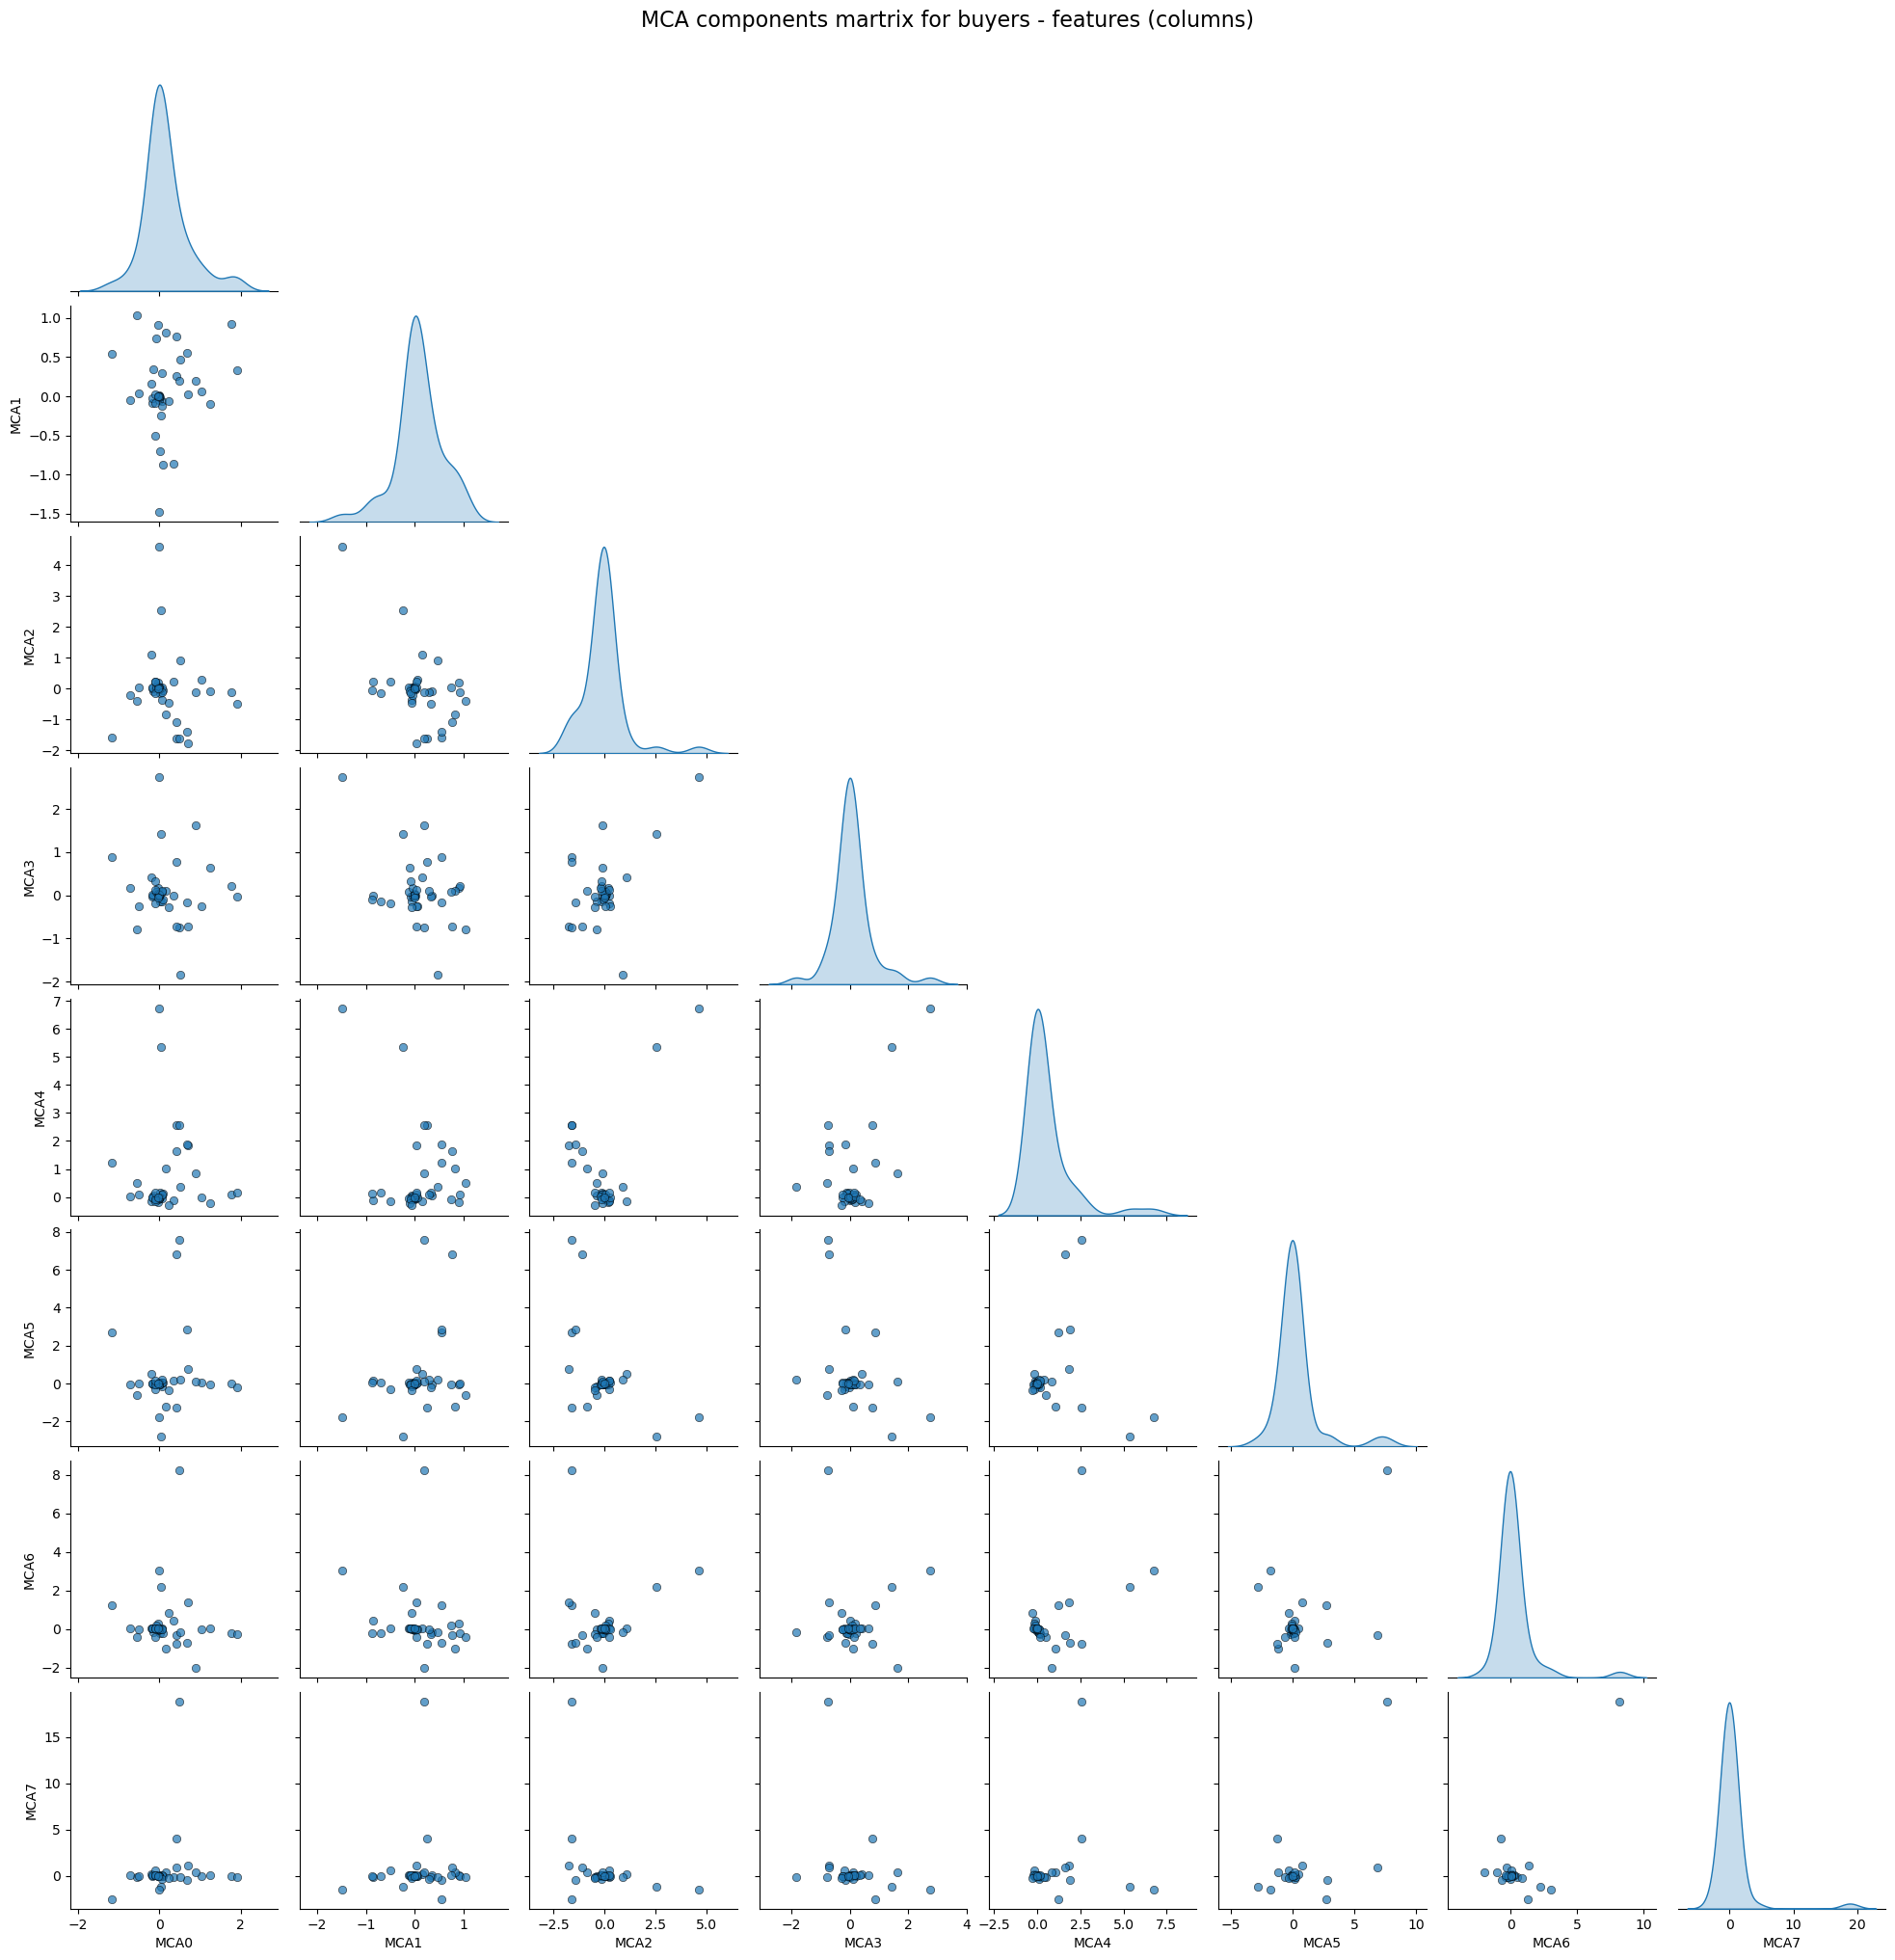

In [12]:
# We take feature coordinates
column_coords = mca.column_coordinates(buyers)

# Convertion to DataFrame
column_coords_df = column_coords.reset_index()
column_coords_df.columns = ['Feature'] + [f'MCA{i}' for i in range(mca.n_components)]

# Creating pairplot matrix 
plt.figure(figsize=(12, 12))
pairplot = sns.pairplot(
    column_coords_df.iloc[:, 1:],
    diag_kind='kde',  
    plot_kws={'alpha': 0.7, 'edgecolor': 'k'},
    corner=True
)
pairplot.fig.suptitle('MCA components martrix for buyers - features (columns)', fontsize=16, y=1.02)
plt.show()


K-means clusterization (segmentation)

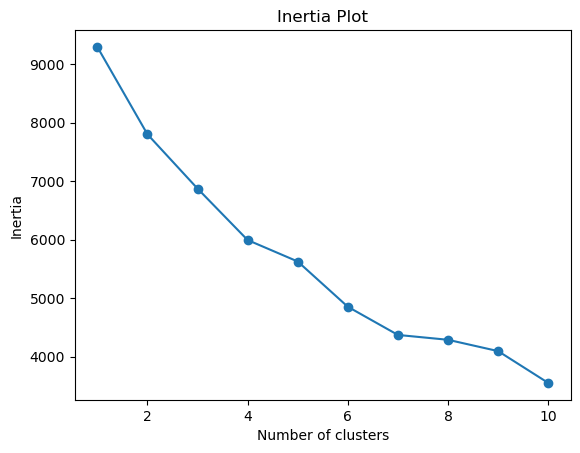

In [13]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(buyers_mca_only)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Plot')
plt.show()

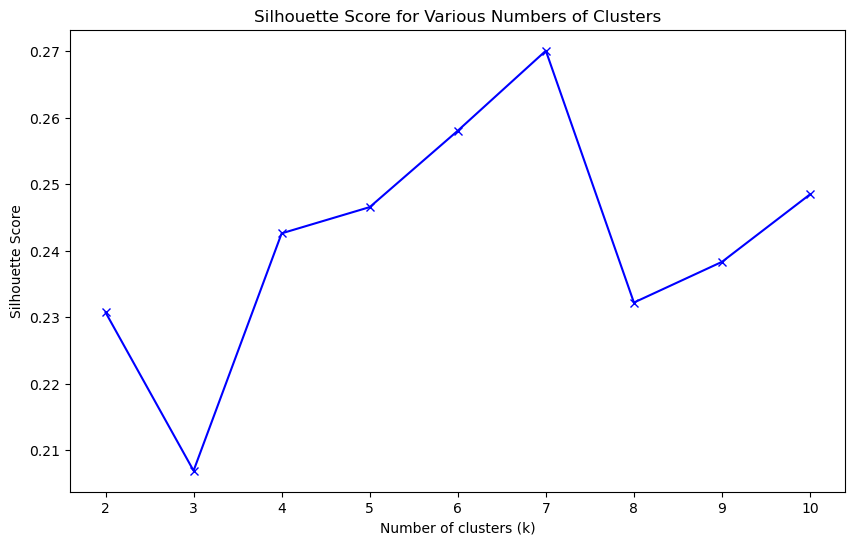

In [14]:
range_n_clusters = range(2, 11)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(buyers_mca_only)
    silhouette_avg = silhouette_score(buyers_mca_only, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.show()

In [15]:
# K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(buyers_mca_only)

# Adding clusters to DataFrame
buyers_with_mca['Cluster'] = clusters

In [16]:
buyers_with_mca.head()

basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
4                   0                1                  0        1   
47                  1                1                  1        1   
56                  1                0                  1        0   
62                  1                1                  0        0   
66                  0                0                  1        0   

    image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
4              0                   0                   0                    0   
47             0                   0                   0                    0   
56             0                   0                   0                    0   
62             0                   0                   0                    0   
66             0                   0                   0                    0   

    list_size_dropdown  closed_minibasket_click  checked_delivery_detail  \
4                    1                        0                        1   
47                   1                        0                        1   
56                   1                        0                        1   
62                   1                        0                        1   
66                   0                        0                        1   

    checked_returns_detail  sign_in  saw_checkout  saw_sizecharts  \
4                        0        1             1               0   
47                       0        1             1               0   
56                       0        1             1               0   
62                       0        1             1               0   
66                       0        1             1               0   

    saw_delivery  saw_account_upgrade  saw_homepage  device_mobile  \
4              0                    0             1              0   
47             0                    0             1              0   
56             0                    0             1              0   
62             0                    0             1              0   
66             0                    0             0              1   

    device_computer  device_tablet  returning_user  loc_uk      MCA0  \
4                 0              1               0       1 -0.111232   
47                1              0               0       1 -0.086510   
56                0              1               0       1 -0.149576   
62                1              0               1       1  0.035546   
66                0              0               0       1  0.003597   

        MCA1      MCA2      MCA3      MCA4      MCA5      MCA6      MCA7  \
4   0.414229  0.357280  0.408941 -0.300678 -0.123697  0.142242  0.298421   
47  0.541981  0.400095 -0.132301  0.169098 -0.194959 -0.100425  0.203913   
56  0.117936  0.120673  0.052515 -0.507634 -0.010816 -0.015903  0.104279   
62  0.190745  0.297507  0.286415  0.305401 -0.171291  0.129342  0.006734   
66 -0.139051 -0.499225 -0.125859 -0.109327 -0.125289 -0.121110  0.206433   

    Cluster  
4         3  
47        0  
56        3  
62        0  
66        2

In [17]:
buyers_with_mca['Cluster'].value_counts()

Cluster
1    5556
2    5361
0    5254
3    2922
Name: count, dtype: int64

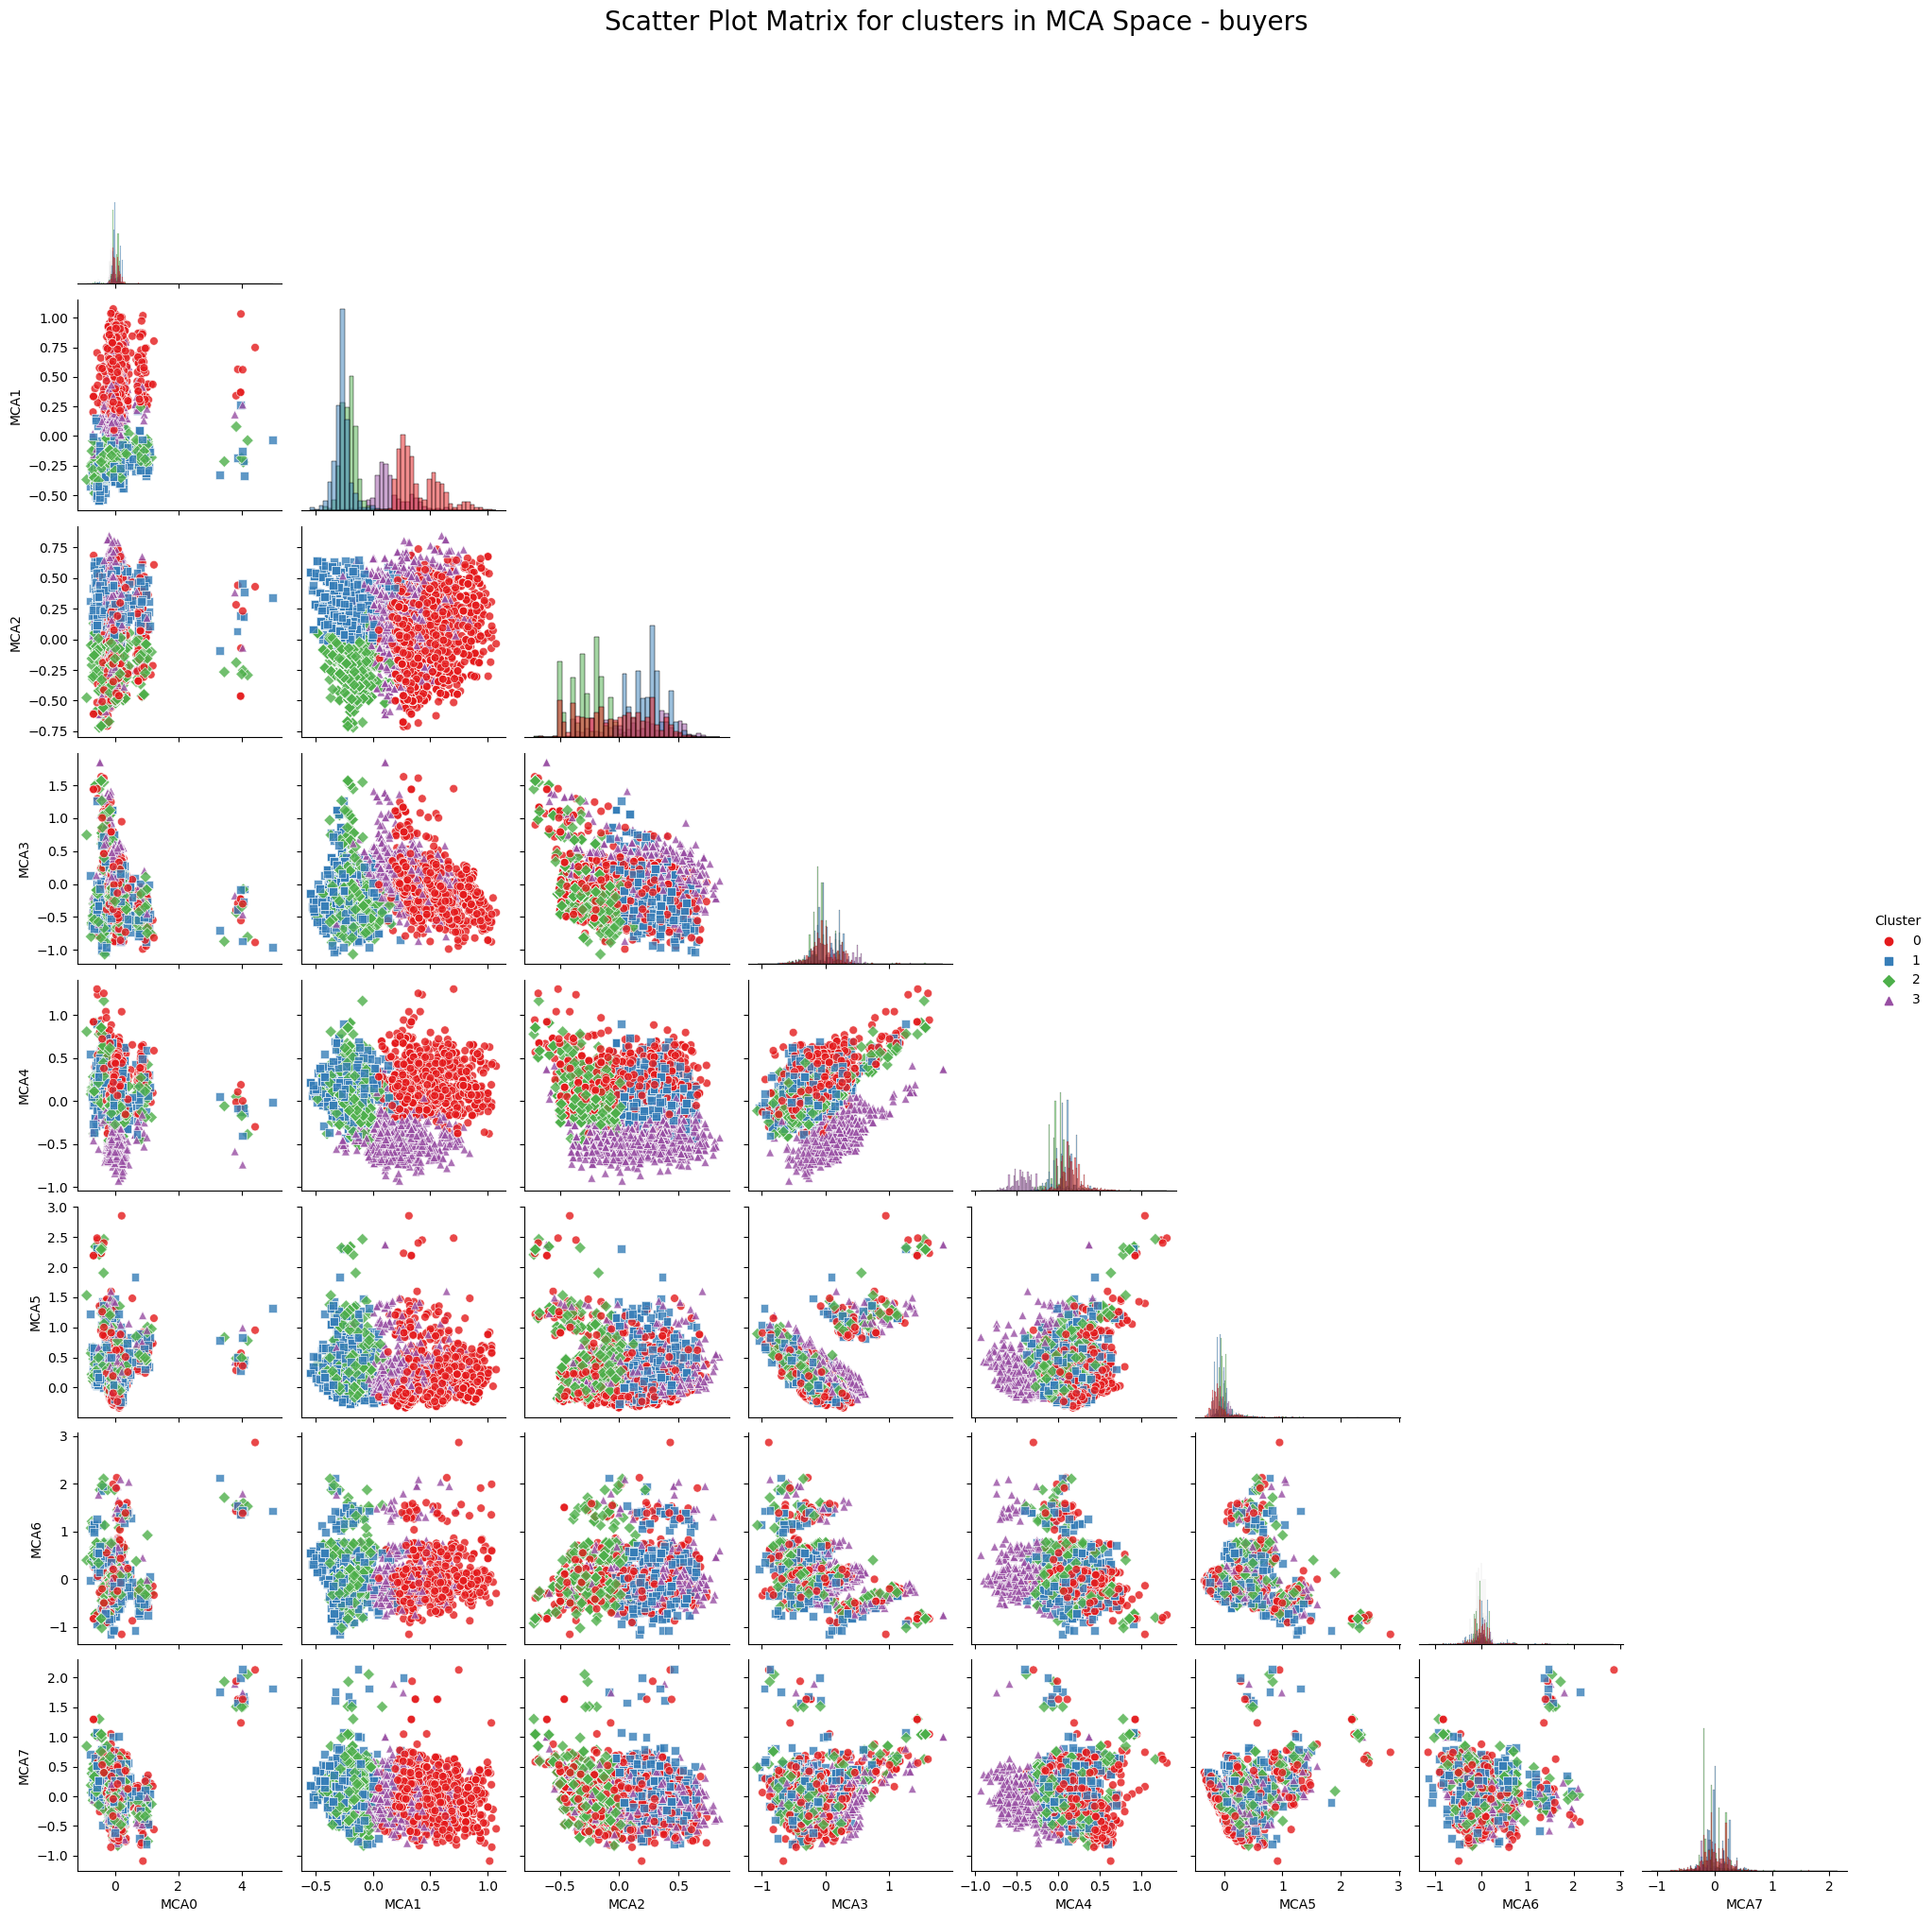

In [18]:
# Choosing all MCA features and cluster column
mca_and_clusters = buyers_with_mca[[f'MCA{i}' for i in range(mca.n_components)] + ['Cluster']]

# Creating scatter plot matrix 
pairplot = sns.pairplot(
    mca_and_clusters, 
    hue='Cluster', 
    palette='Set1', 
    diag_kind='hist',
    markers=['o', 's', 'D', '^'],  
    height=2.5, 
    plot_kws={'alpha': 0.8, 's': 40},
    corner=True
)
pairplot.fig.suptitle('Scatter Plot Matrix for clusters in MCA Space - buyers', y=1.02, fontsize=20)
plt.show()


In [19]:
cluster_means = buyers_with_mca.groupby('Cluster').mean()

cluster_means = cluster_means.transpose()

display(cluster_means)

Cluster                         0         1         2         3
basket_icon_click        0.594214  0.924046  0.598955  0.722108
basket_add_list          0.430339  0.812455  0.013244  0.503765
basket_add_detail        0.764370  0.694384  0.780265  0.708419
sort_by                  0.226684  0.001080  0.000000  0.152635
image_picker             0.232585  0.001080  0.000373  0.113963
account_page_click       0.000952  0.042837  0.024063  0.002738
promo_banner_click       0.053673  0.074514  0.021638  0.050992
detail_wishlist_add      0.013704  0.010979  0.008394  0.005476
list_size_dropdown       0.471070  0.976242  0.113598  0.630390
closed_minibasket_click  0.030072  0.206263  0.050923  0.143053
checked_delivery_detail  0.989151  0.991001  0.989181  0.989049
checked_returns_detail   0.048915  0.025918  0.031711  0.041752
sign_in                  0.992387  0.997120  0.991606  0.994524
saw_checkout             1.000000  1.000000  1.000000  1.000000
saw_sizecharts           0.001332  0.001260  0.000933  0.000684
saw_delivery             0.024553  0.013319  0.011378  0.018823
saw_account_upgrade      0.005900  0.003600  0.004104  0.008898
saw_homepage             0.658736  0.737581  0.487596  0.649897
device_mobile            0.028930  0.995860  0.998881  0.044832
device_computer          0.998668  0.024478  0.009327  0.017796
device_tablet            0.004187  0.002880  0.001865  0.999316
returning_user           0.622383  0.710223  0.701735  0.677618
loc_uk                   0.939665  0.981281  0.983585  0.984600
MCA0                     0.004801  0.013490 -0.003180 -0.028449
MCA1                     0.406458 -0.264564 -0.210152  0.157773
MCA2                    -0.038196  0.232843 -0.279907  0.139488
MCA3                    -0.023728 -0.037391 -0.060458  0.224683
MCA4                     0.152218  0.080642  0.003118 -0.432759
MCA5                    -0.045600 -0.020847  0.024512  0.076661
MCA6                    -0.012077 -0.023075  0.008102  0.050727
MCA7                     0.006569  0.043733 -0.034770 -0.031176

**1. Non-buyers segmentation**

In [20]:
# Creating model
mca = prince.MCA(
    n_components=7,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Model fitting and data transformation
mca_results_non_buyers = mca.fit_transform(non_buyers)

# Adding MCA results to original dataset
non_buyers_with_mca = non_buyers.copy()

# Loop for adding all compoments to DataFrame
for i in range(mca.n_components):
    non_buyers_with_mca[f'MCA{i}'] = mca_results_non_buyers.iloc[:, i- 1]


In [21]:
non_buyers_mca_only = non_buyers_with_mca[['MCA0', 'MCA1', 'MCA2', 'MCA3', 'MCA4', 'MCA5', 'MCA6']]

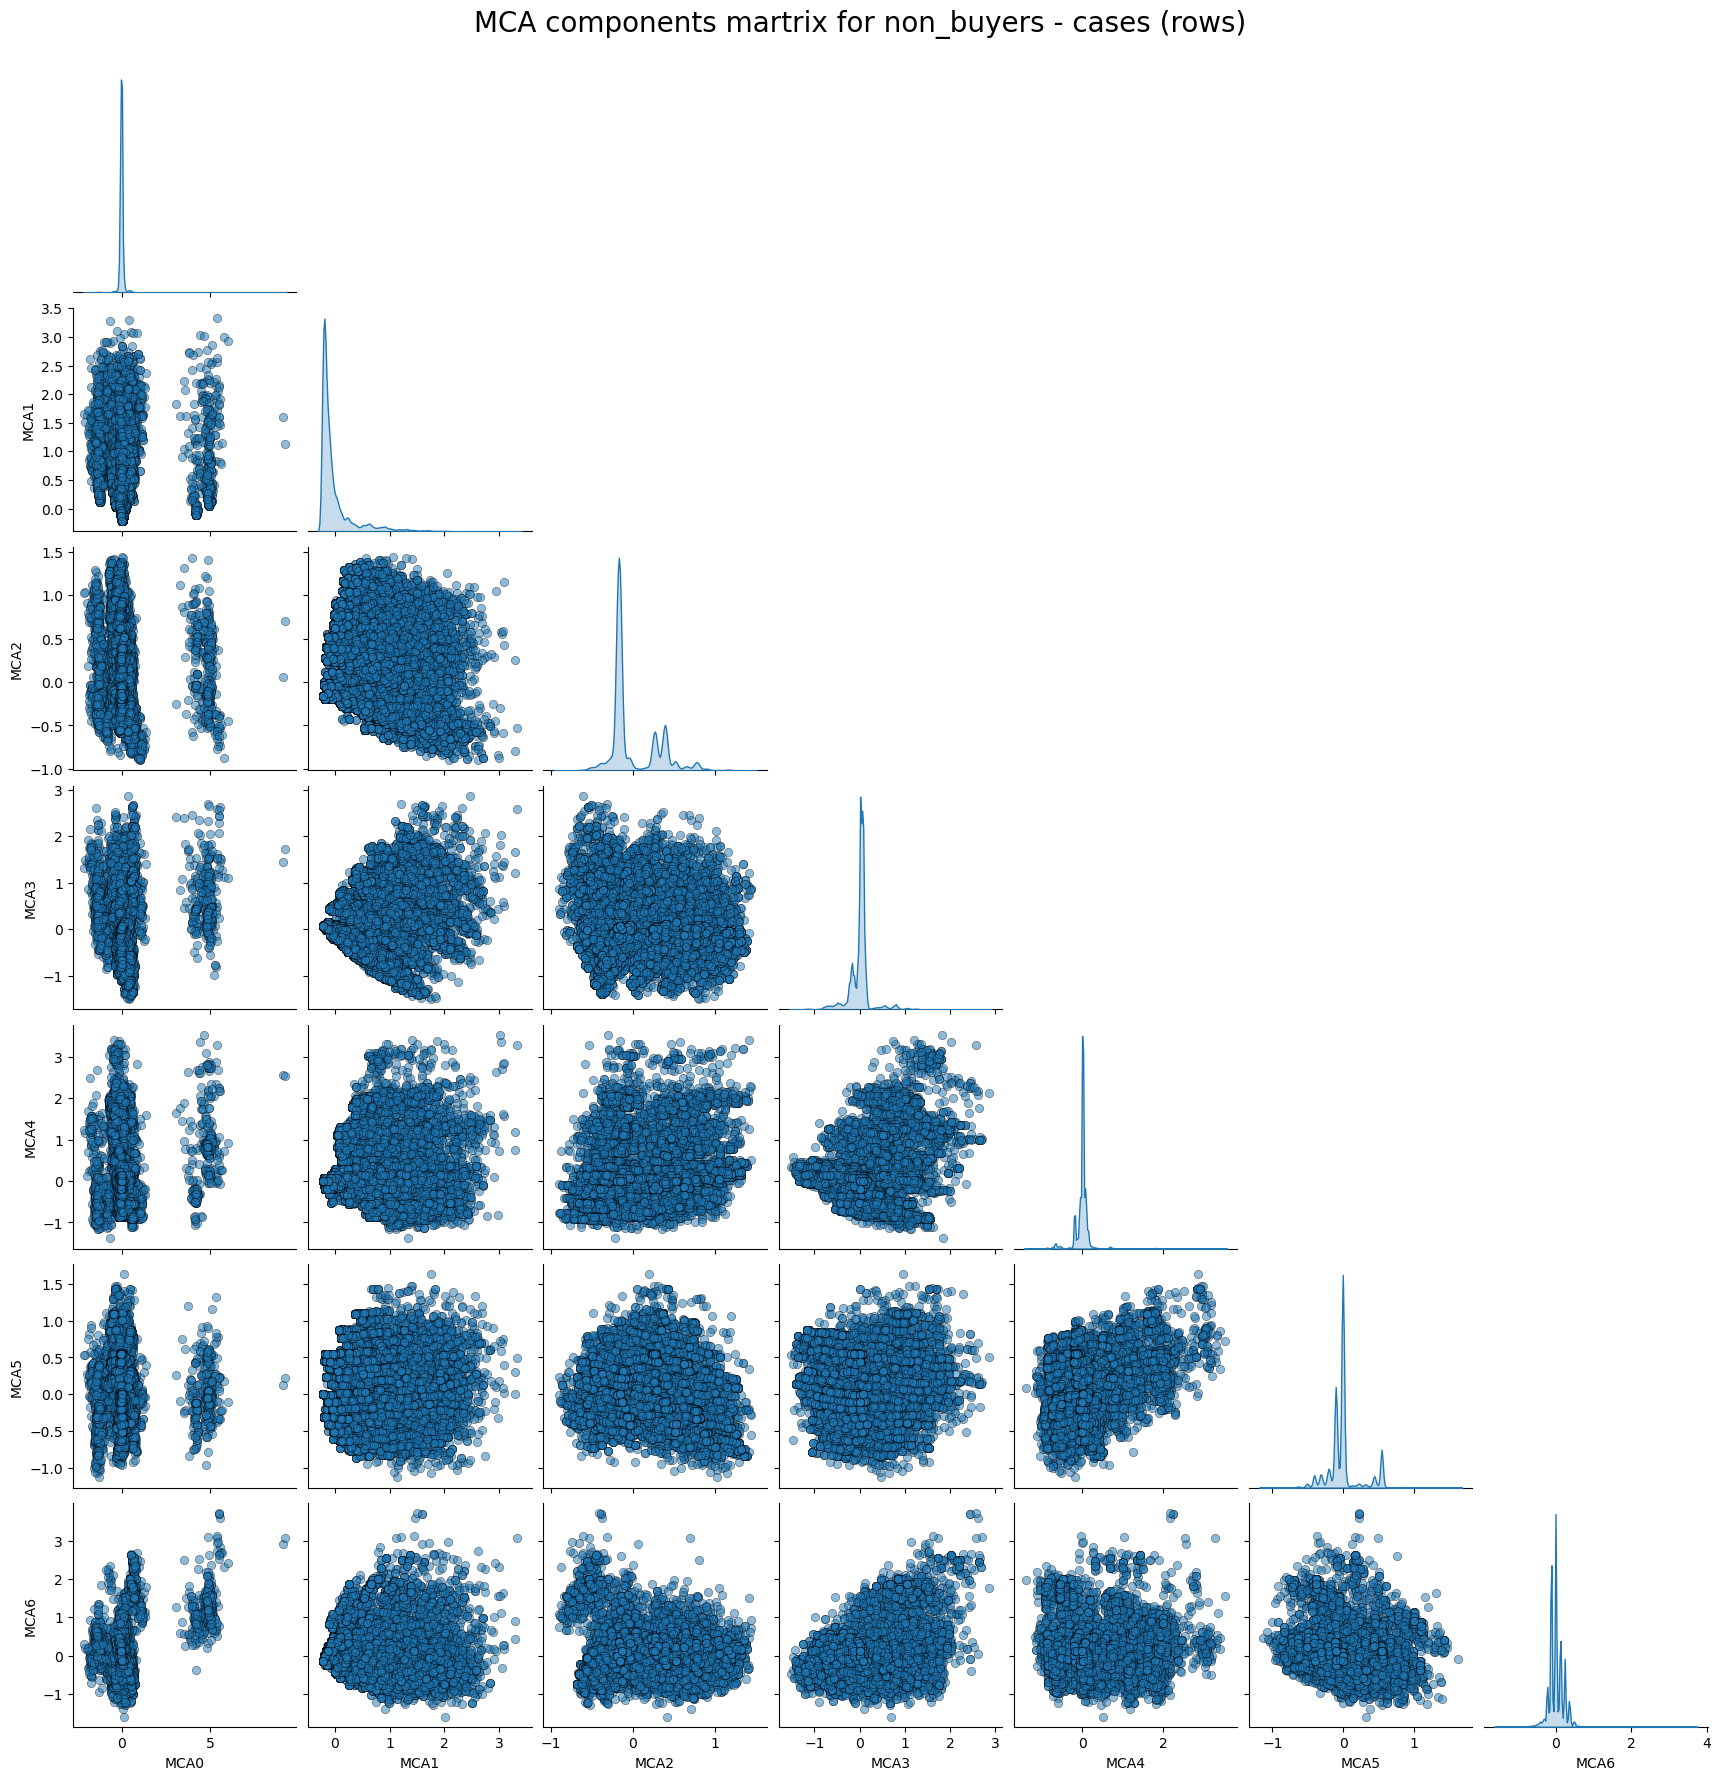

In [22]:
# Creating pairplot matrix 
pairplot = sns.pairplot(
    non_buyers_mca_only,
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 'edgecolor': 'k'},
    corner=True
)
pairplot.fig.suptitle('MCA components martrix for non_buyers - cases (rows)', fontsize=20, y=1.02)
plt.show()


In [23]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.129        12.91%                     12.91%
1              0.092         9.22%                     22.13%
2              0.070         7.01%                     29.14%
3              0.058         5.77%                     34.91%
4              0.056         5.57%                     40.48%
5              0.047         4.66%                     45.14%
6              0.044         4.38%                     49.51%

In [24]:
mca.row_coordinates(non_buyers).head()

0         1         2         3         4         5         6
0  0.067837 -0.144024  0.551140  0.684006  0.220118 -0.165827 -0.078824
1 -0.221015 -0.158632  0.068909  0.007093 -0.004018 -0.132976  0.038645
2 -0.185708 -0.192355  0.015952  0.010261 -0.007087 -0.014287 -0.014074
3 -0.185708 -0.192355  0.015952  0.010261 -0.007087 -0.014287 -0.014074
5 -0.185708 -0.192355  0.015952  0.010261 -0.007087 -0.014287 -0.014074

In [25]:
mca.column_coordinates(non_buyers).head(50)

0         1         2         3         4  \
basket_icon_click__0       -0.189809  0.042683  0.077611  0.000088 -0.008893   
basket_icon_click__1        2.432911 -0.547105 -0.994792 -0.001124  0.113991   
basket_add_list__0         -0.142195  0.018942  0.109188 -0.017640 -0.006868   
basket_add_list__1          2.279484 -0.303658 -1.750354  0.282780  0.110096   
basket_add_detail__0       -0.192623  0.027238  0.047459 -0.008140 -0.008314   
basket_add_detail__1        2.060845 -0.291412 -0.507757  0.087090  0.088949   
sort_by__0                 -0.040267 -0.092467  0.025365 -0.008539  0.024388   
sort_by__1                  1.120305  2.572615 -0.705703  0.237585 -0.678528   
image_picker__0            -0.032018 -0.066658  0.005214 -0.015426  0.016865   
image_picker__1             1.284377  2.673965 -0.209169  0.618807 -0.676514   
account_page_click__0      -0.008366  0.005216 -0.012337  0.003775  0.003605   
account_page_click__1       2.921101 -1.821355  4.307770 -1.317940 -1.258716   
promo_banner_click__0      -0.024016 -0.007058  0.017052 -0.017319  0.006324   
promo_banner_click__1       1.608102  0.472633 -1.141782  1.159672 -0.423441   
detail_wishlist_add__0     -0.008773 -0.000243 -0.006843  0.004927  0.002598   
detail_wishlist_add__1      2.715711  0.075112  2.118314 -1.524967 -0.804133   
list_size_dropdown__0      -0.239433  0.009706  0.253064 -0.088369  0.001865   
list_size_dropdown__1       0.865366 -0.035079 -0.914631  0.319387 -0.006742   
closed_minibasket_click__0 -0.041950  0.009537  0.033200 -0.000390 -0.019367   
closed_minibasket_click__1  3.074529 -0.698996 -2.433256  0.028566  1.419411   
checked_delivery_detail__0 -0.053275 -0.002277 -0.065544 -0.083453 -0.027145   
checked_delivery_detail__1  2.333943  0.099753  2.871445  3.656010  1.189203   
checked_returns_detail__0  -0.016651 -0.003911 -0.024329 -0.048974 -0.014067   
checked_returns_detail__1   2.066763  0.485501  3.019795  6.078799  1.746005   
sign_in__0                 -0.159095  0.035657 -0.112173  0.087553  0.012112   
sign_in__1                  3.074301 -0.689029  2.167594 -1.691844 -0.234042   
saw_checkout__0            -0.133086  0.029346 -0.099277  0.078442  0.008014   
saw_checkout__1             3.208290 -0.707449  2.393271 -1.890990 -0.193203   
saw_sizecharts__0          -0.000319 -0.000319 -0.000820  0.000647  0.000218   
saw_sizecharts__1           0.892308  0.891244  2.292133 -1.809816 -0.609038   
saw_delivery__0            -0.012179 -0.002439 -0.021357 -0.034367 -0.009295   
saw_delivery__1             2.397614  0.480218  4.204587  6.765935  1.829834   
saw_account_upgrade__0     -0.001987 -0.000187 -0.001961 -0.004133 -0.000258   
saw_account_upgrade__1      2.165808  0.204164  2.136863  4.504363  0.281038   
saw_homepage__0            -0.208841 -0.054830  0.092424  0.011403  0.154640   
saw_homepage__1             0.550453  0.144519 -0.243606 -0.030054 -0.407593   
device_mobile__0            0.179778  1.332773  0.060404 -0.255557  0.360157   
device_mobile__1           -0.082714 -0.613194 -0.027791  0.117579 -0.165704   
device_computer__0         -0.058625 -0.368603 -0.045282  0.000518  0.197496   
device_computer__1          0.249690  1.569904  0.192860 -0.002208 -0.841150   
device_tablet__0           -0.015846 -0.140119  0.019304  0.093175 -0.312461   
device_tablet__1            0.108753  0.961629 -0.132481 -0.639459  2.144411   
returning_user__0          -0.154250  0.124511  0.170498 -0.009251  0.008804   
returning_user__1           0.137545 -0.111026 -0.152034  0.008249 -0.007850   
loc_uk__0                   0.139673  0.796147  0.176654  0.312044 -1.547003   
loc_uk__1                  -0.010260 -0.058481 -0.012976 -0.022921  0.113635   

                                   5          6  
basket_icon_click__0        0.051364  -0.033398  
basket_icon_click__1       -0.658369   0.428090  
basket_add_list__0          0.006832   0.001692  
basket_add_list__1         -0.109527  -0.027117  
basket_add_detail__0    

In [26]:
# Features coordinetes
column_coords = mca.column_coordinates(non_buyers)

# Weight calculations for each dimension (absolute values)
absolute_weights = column_coords.abs()

# 3 features with highest weights for each dimension
top_variables_per_dimension = {}
for dimension in absolute_weights.columns:
    top_variables = absolute_weights[dimension].nlargest(3)
    top_variables_per_dimension[dimension] = top_variables

for dimension, top_variables in top_variables_per_dimension.items():
    print(f"Top 3 variables for dimension {dimension}:")
    display(top_variables)

Top 3 variables for dimension 0:


saw_checkout__1               3.208290
closed_minibasket_click__1    3.074529
sign_in__1                    3.074301
Name: 0, dtype: float64

Top 3 variables for dimension 1:


image_picker__1          2.673965
sort_by__1               2.572615
account_page_click__1    1.821355
Name: 1, dtype: float64

Top 3 variables for dimension 2:


account_page_click__1        4.307770
saw_delivery__1              4.204587
checked_returns_detail__1    3.019795
Name: 2, dtype: float64

Top 3 variables for dimension 3:


saw_delivery__1              6.765935
checked_returns_detail__1    6.078799
saw_account_upgrade__1       4.504363
Name: 3, dtype: float64

Top 3 variables for dimension 4:


device_tablet__1             2.144411
saw_delivery__1              1.829834
checked_returns_detail__1    1.746005
Name: 4, dtype: float64

Top 3 variables for dimension 5:


account_page_click__1     8.056133
saw_account_upgrade__1    5.957216
saw_sizecharts__1         4.761230
Name: 5, dtype: float64

Top 3 variables for dimension 6:


saw_account_upgrade__1    23.610523
saw_sizecharts__1         19.999802
detail_wishlist_add__1     5.973976
Name: 6, dtype: float64

<Figure size 1200x1200 with 0 Axes>

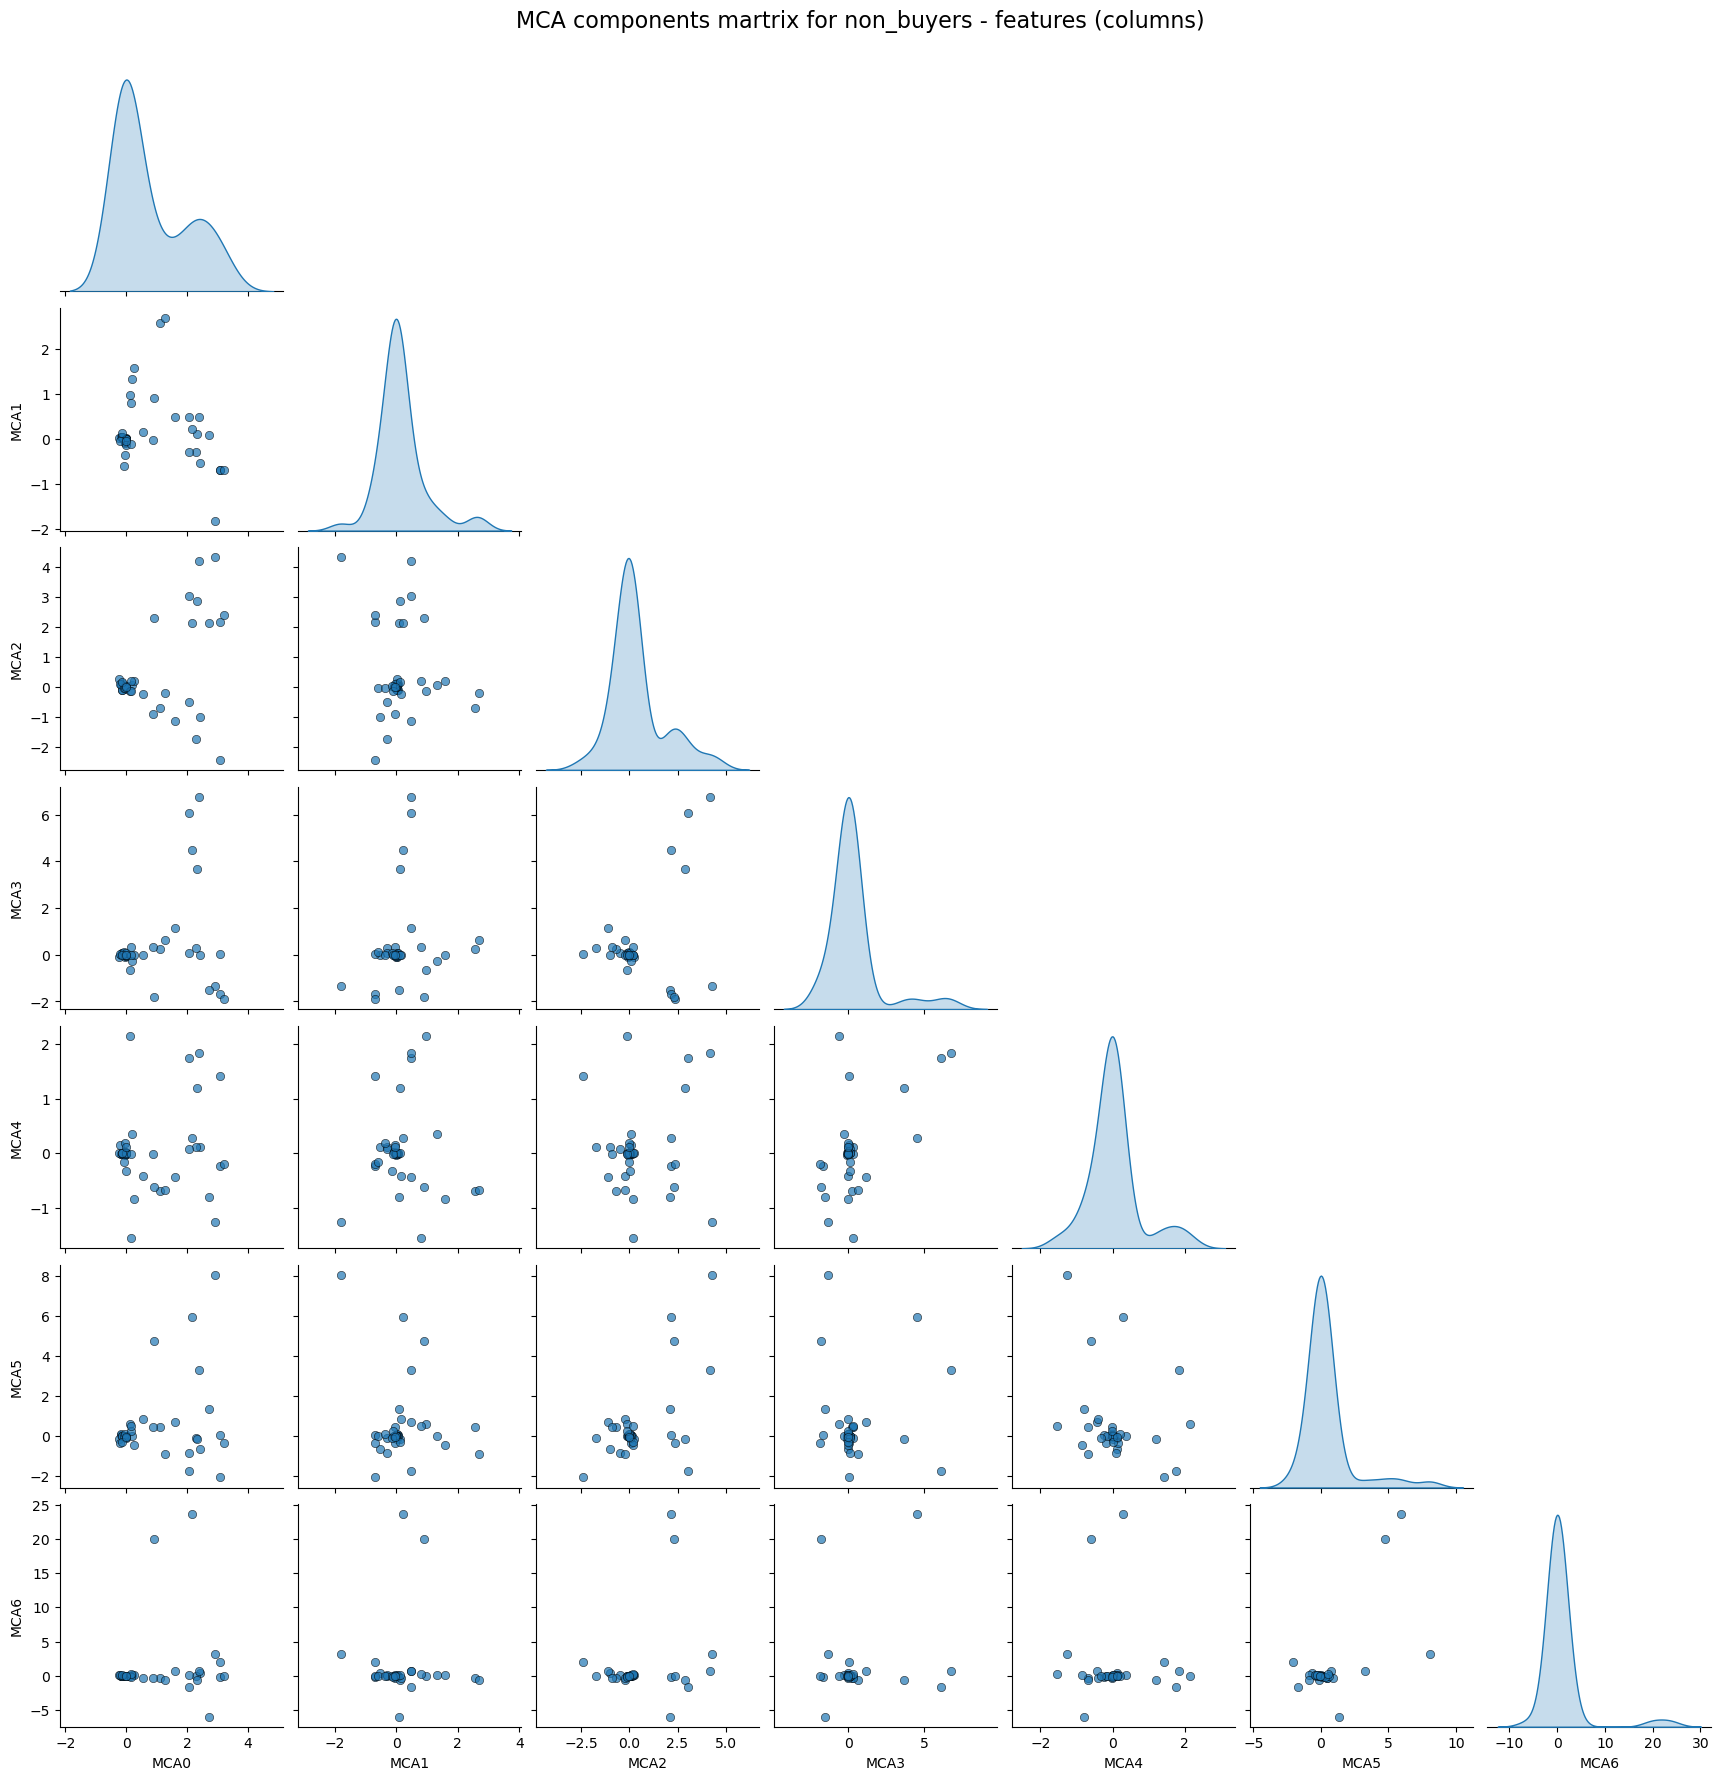

In [27]:
# We take feature coordinates
column_coords = mca.column_coordinates(non_buyers)

# Convertion to DataFrame
column_coords_df = column_coords.reset_index()
column_coords_df.columns = ['Feature'] + [f'MCA{i}' for i in range(mca.n_components)]

# Creating pairplot matrix 
plt.figure(figsize=(12, 12))
pairplot = sns.pairplot(
    column_coords_df.iloc[:, 1:],
    diag_kind='kde',  
    plot_kws={'alpha': 0.7, 'edgecolor': 'k'},
    corner=True
)
pairplot.fig.suptitle('MCA components martrix for non_buyers - features (columns)', fontsize=16, y=1.02)
plt.show()


K-means clusterization (segmentation)

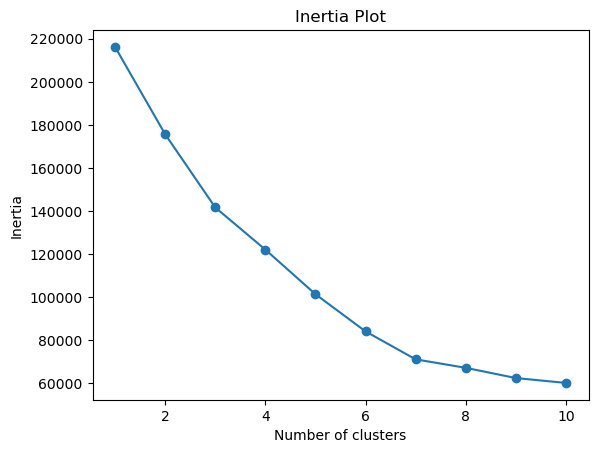

In [28]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(non_buyers_mca_only)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Plot')
plt.show()


Ze względu na dużą ilość przypadków non_buyers wartość silhouette_scores zostaną wyliczone dla próbki danych stanowiącej 10 % tego zbioru danych (n= 43630)

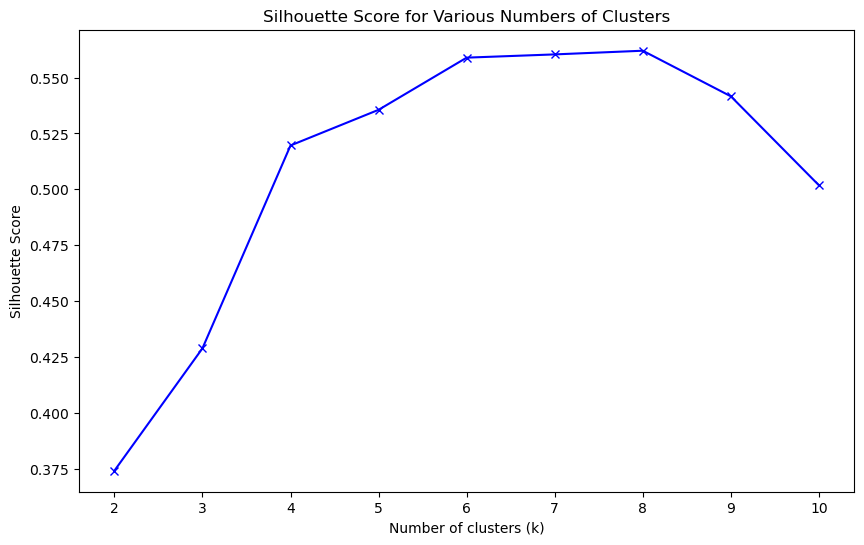

In [36]:
# Data set sampling
sample_size = 43630
if len(non_buyers_mca_only) > sample_size:
    sample_data = non_buyers_mca_only.sample(n=sample_size, random_state=42)
else:
    sample_data = non_buyers_mca_only

range_n_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(sample_data)
    silhouette_avg = silhouette_score(sample_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.show()


In [37]:
# K-Means model
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(non_buyers_mca_only)

# Adding clusters to DataFrame
non_buyers_with_mca['Cluster'] = clusters

In [38]:
non_buyers_with_mca.head()

basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                0                  0        0   
3                  0                0                  0        0   
5                  0                0                  0        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   0                    0   
1             0                   0                   0                    0   
2             0                   0                   0                    0   
3             0                   0                   0                    0   
5             0                   0                   0                    0   

   list_size_dropdown  closed_minibasket_click  checked_delivery_detail  \
0                   0                        0                        1   
1                   0                        0                        0   
2                   0                        0                        0   
3                   0                        0                        0   
5                   0                        0                        0   

   checked_returns_detail  sign_in  saw_checkout  saw_sizecharts  \
0                       0        0             0               0   
1                       0        0             0               0   
2                       0        0             0               0   
3                       0        0             0               0   
5                       0        0             0               0   

   saw_delivery  saw_account_upgrade  saw_homepage  device_mobile  \
0             0                    0             0              1   
1             0                    0             0              1   
2             0                    0             0              1   
3             0                    0             0              1   
5             0                    0             0              1   

   device_computer  device_tablet  returning_user  loc_uk      MCA0      MCA1  \
0                0              0               0       1 -0.078824  0.067837   
1                0              0               0       1  0.038645 -0.221015   
2                0              0               1       1 -0.014074 -0.185708   
3                0              0               1       1 -0.014074 -0.185708   
5                0              0               1       1 -0.014074 -0.185708   

       MCA2      MCA3      MCA4      MCA5      MCA6  Cluster  
0 -0.144024  0.551140  0.684006  0.220118 -0.165827        1  
1 -0.158632  0.068909  0.007093 -0.004018 -0.132976        1  
2 -0.192355  0.015952  0.010261 -0.007087 -0.014287        1  
3 -0.192355  0.015952  0.010261 -0.007087 -0.014287        1  
5 -0.192355  0.015952  0.010261 -0.007087 -0.014287        1

In [39]:
non_buyers_with_mca['Cluster'].value_counts()

Cluster
1    260974
2     73793
3     49445
4     28552
0     18389
5      5155
Name: count, dtype: int64

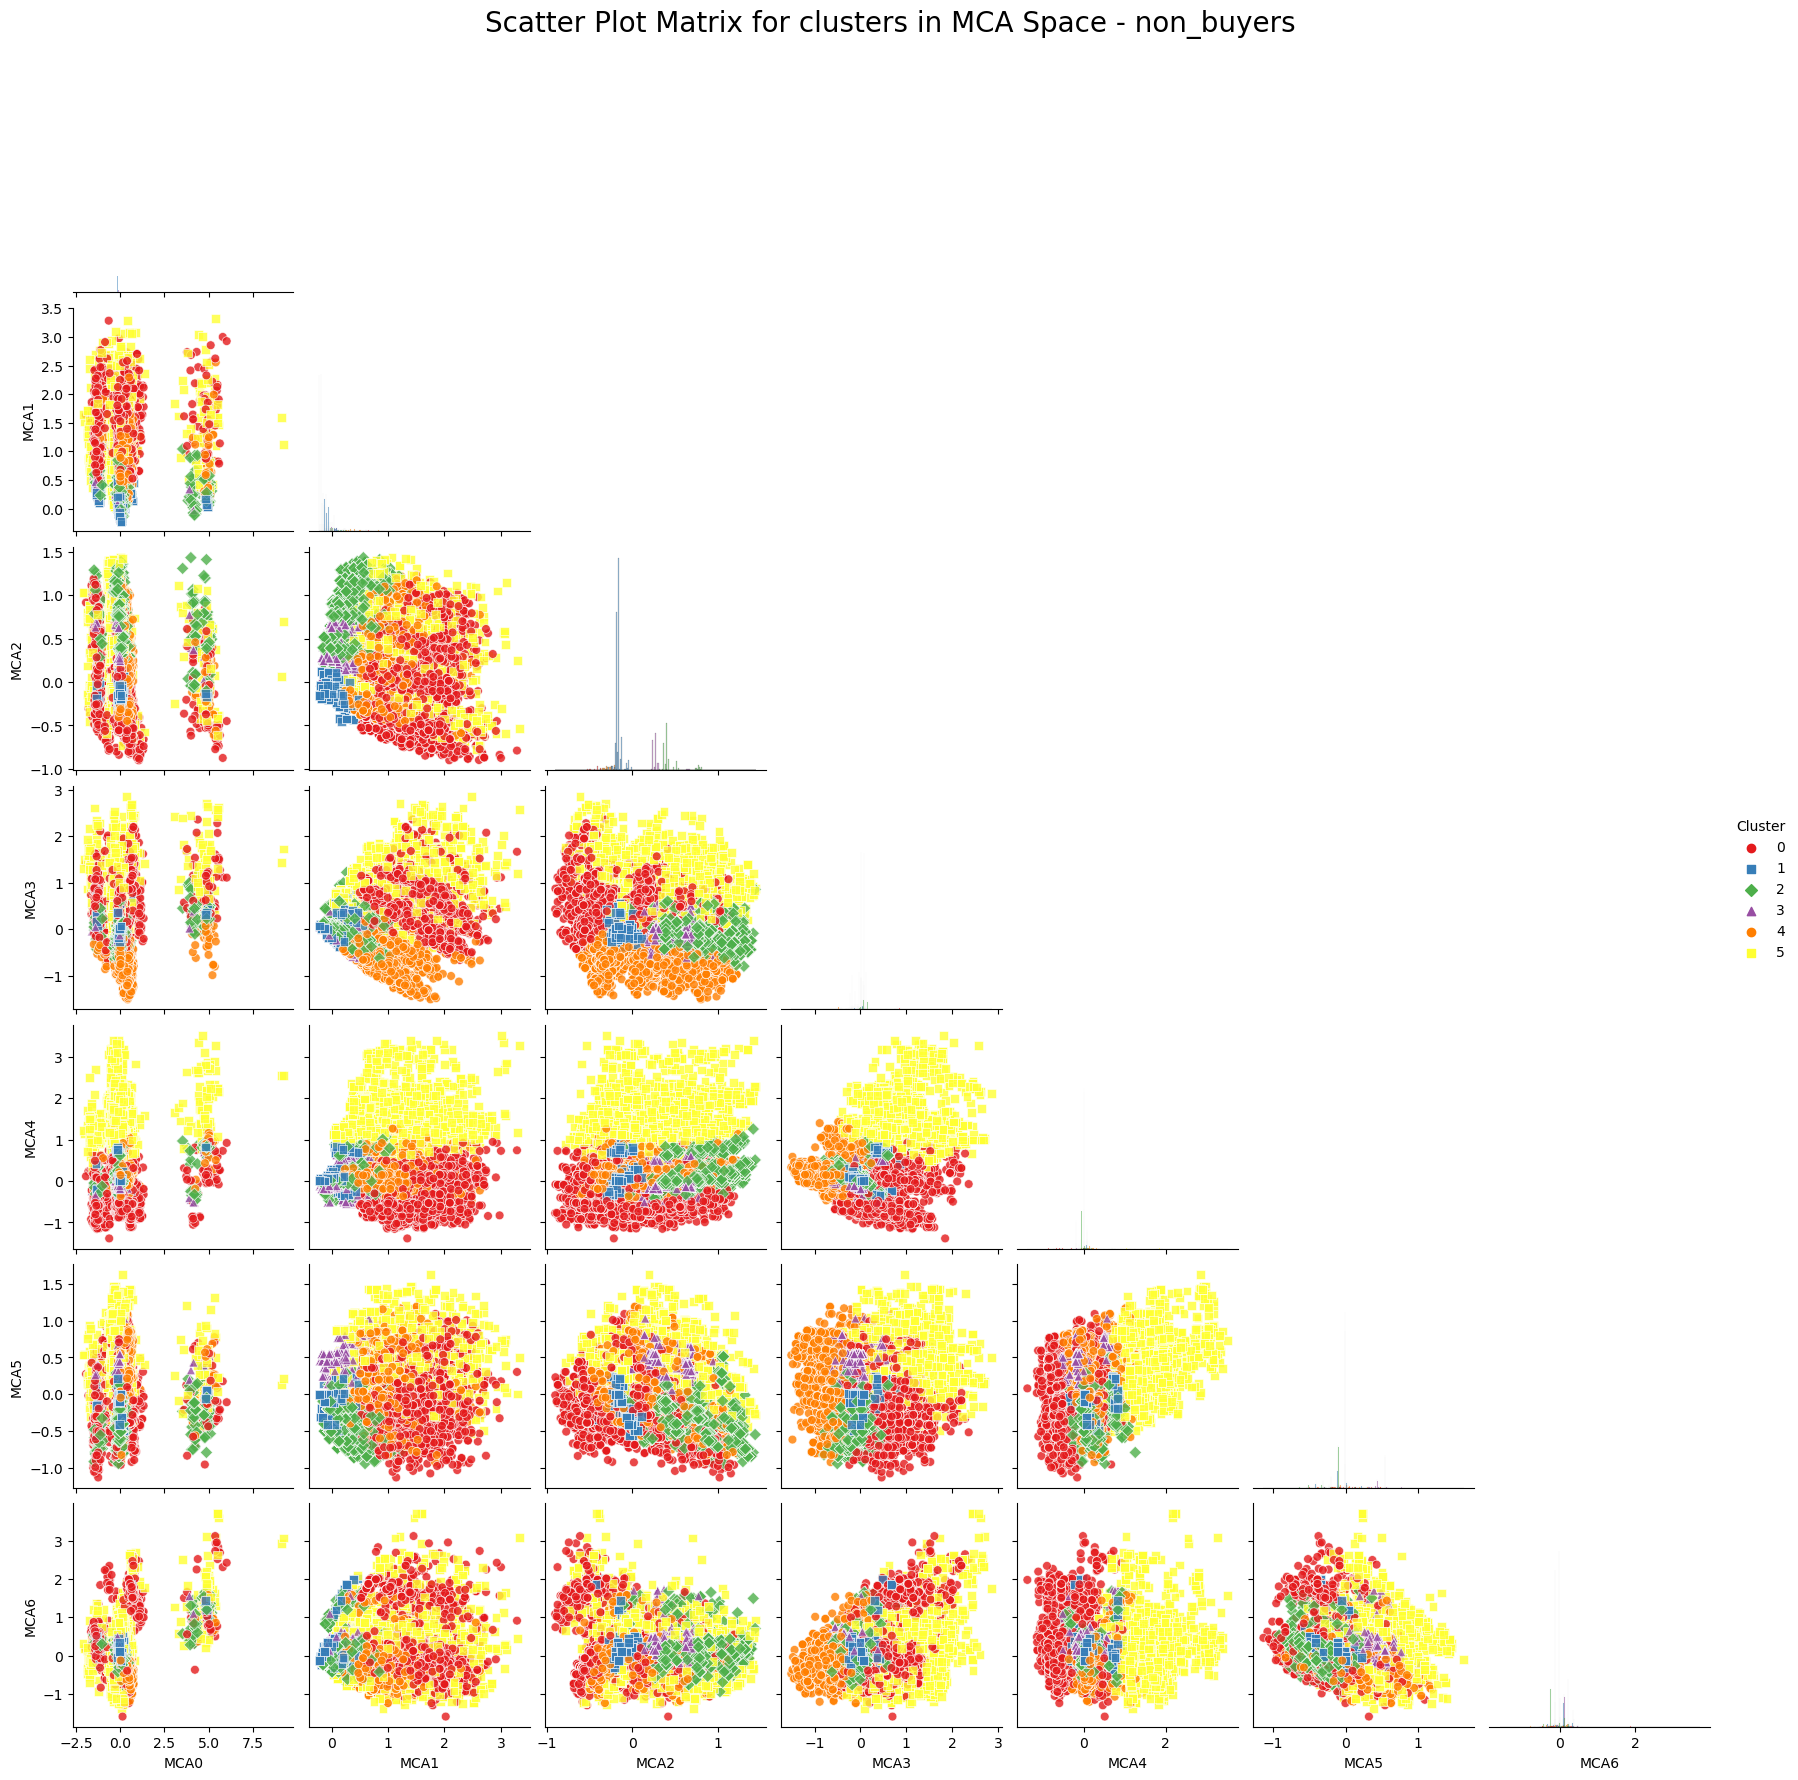

In [40]:
# Choosing all MCA features and cluster column
mca_and_clusters = non_buyers_with_mca[[f'MCA{i}' for i in range(mca.n_components)] + ['Cluster']]

# Creating scatter plot matrix 
pairplot = sns.pairplot(
    mca_and_clusters, 
    hue='Cluster', 
    palette='Set1', 
    diag_kind='hist',
    markers=['o', 's', 'D', '^'],  
    height=2.5, 
    plot_kws={'alpha': 0.8, 's': 40},
    corner=True
)
pairplot.fig.suptitle('Scatter Plot Matrix for clusters in MCA Space - non_buyers', y=1.02, fontsize=20)
plt.show()


In [41]:
cluster_means = non_buyers_with_mca.groupby('Cluster').mean()

cluster_means = cluster_means.transpose()

display(cluster_means)

Cluster                         0         1         2         3         4  \
basket_icon_click        0.407309  0.012319  0.016993  0.011063  0.630394   
basket_add_list          0.218500  0.001015  0.015584  0.021802  0.648781   
basket_add_detail        0.446299  0.027964  0.039990  0.028537  0.562693   
sort_by                  0.055033  0.000004  0.126475  0.054181  0.059015   
image_picker             0.045951  0.000000  0.088816  0.029204  0.041924   
account_page_click       0.059818  0.000065  0.000000  0.000000  0.000035   
promo_banner_click       0.035565  0.005932  0.016533  0.010759  0.076387   
detail_wishlist_add      0.051063  0.000766  0.001233  0.000809  0.001576   
list_size_dropdown       0.358856  0.154579  0.163782  0.208474  0.823375   
closed_minibasket_click  0.055087  0.000000  0.000678  0.005804  0.152879   
checked_delivery_detail  0.140029  0.008181  0.012481  0.007847  0.013449   
checked_returns_detail   0.016314  0.000000  0.000054  0.000000  0.002207   
sign_in                  0.995976  0.001920  0.003876  0.003479  0.044830   
saw_checkout             0.889336  0.001150  0.000434  0.000991  0.001401   
saw_sizecharts           0.000870  0.000000  0.001545  0.000202  0.000210   
saw_delivery             0.002121  0.000000  0.000014  0.000000  0.000070   
saw_account_upgrade      0.003752  0.000245  0.001138  0.000526  0.002662   
saw_homepage             0.530263  0.225452  0.312143  0.230175  0.521014   
device_mobile            0.676872  1.000000  0.002751  0.002852  0.778019   
device_computer          0.218881  0.000376  0.993821  0.000728  0.135122   
device_tablet            0.124912  0.000011  0.004973  1.000000  0.092428   
returning_user           0.657458  0.527187  0.446601  0.513500  0.705134   
loc_uk                   0.923976  0.947784  0.844104  0.971969  0.952052   
MCA0                    -0.039806 -0.012152  0.048708 -0.016828  0.065467   
MCA1                     1.111921 -0.143140 -0.020544 -0.067877  0.631283   
MCA2                    -0.225843 -0.166628  0.487891  0.297222 -0.137518   
MCA3                     0.607935 -0.000068  0.030637 -0.037635 -0.566163   
MCA4                    -0.515167  0.027926 -0.012708 -0.162152  0.109499   
MCA5                    -0.080279 -0.043364 -0.202108  0.503481  0.022720   
MCA6                     0.008209  0.002519 -0.081928  0.148008 -0.085527   

Cluster                         5  
basket_icon_click        0.207759  
basket_add_list          0.113288  
basket_add_detail        0.264210  
sort_by                  0.083026  
image_picker             0.110960  
account_page_click       0.024830  
promo_banner_click       0.055286  
detail_wishlist_add      0.017459  
list_size_dropdown       0.332493  
closed_minibasket_click  0.030650  
checked_delivery_detail  0.646751  
checked_returns_detail   0.605238  
sign_in                  0.177304  
saw_checkout             0.116974  
saw_sizecharts           0.001940  
saw_delivery             0.419593  
saw_account_upgrade      0.015713  
saw_homepage             0.412415  
device_mobile            0.551697  
device_computer          0.312124  
device_tablet            0.143162  
returning_user           0.483414  
loc_uk                   0.889040  
MCA0                    -0.141238  
MCA1                     0.728711  
MCA2                     0.167997  
MCA3                     0.893058  
MCA4                     1.554686  
MCA5                     0.419803  
MCA6                     0.070013

In [47]:
buyers_with_mca.to_csv('Data/buyers_with_clusters.csv')

In [44]:
non_buyers_with_mca.to_csv('Data/non_buyers_with_clusters.csv')